In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
customers.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [7]:
customers.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [8]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [10]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

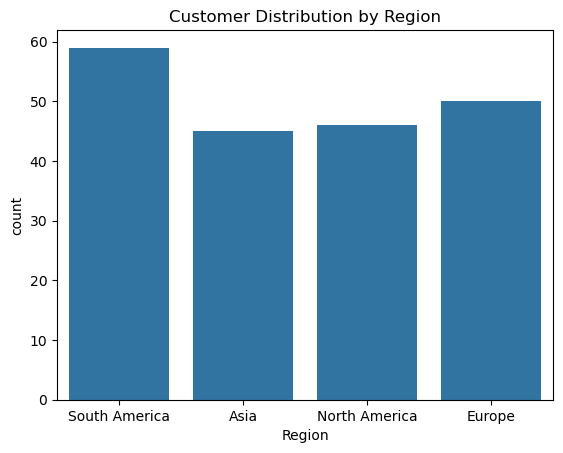

In [12]:
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

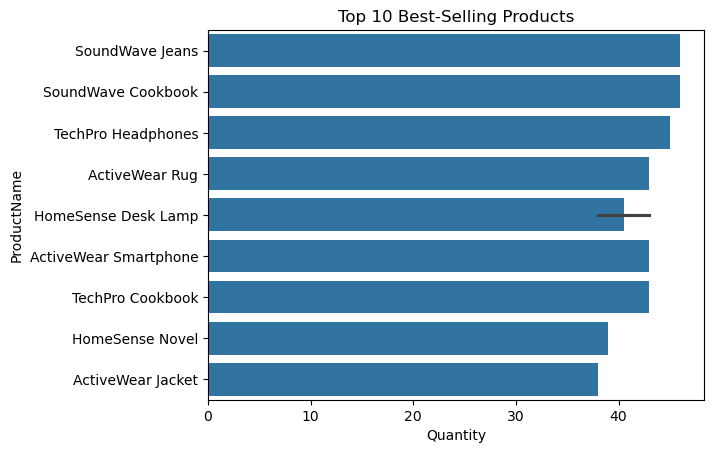

In [13]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID')
sns.barplot(data=top_products, x='Quantity', y='ProductName')
plt.title('Top 10 Best-Selling Products')
plt.show()

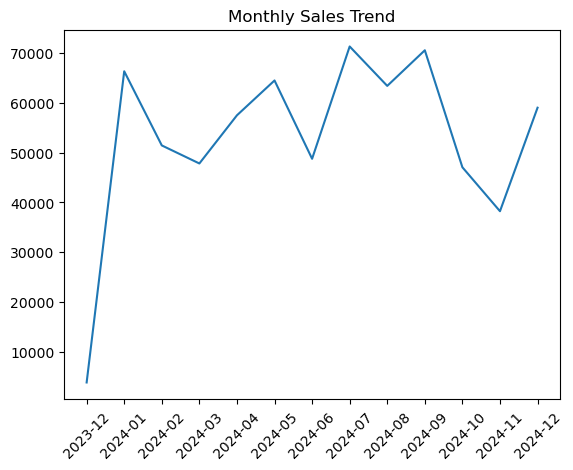

In [14]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
sales_trend = transactions.groupby('Month')['TotalValue'].sum().reset_index()
plt.plot(sales_trend['Month'].astype(str), sales_trend['TotalValue'])
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()

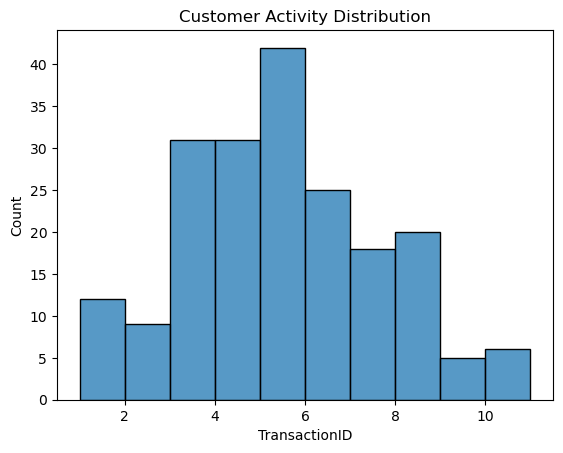

In [15]:
customer_activity = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
sns.histplot(customer_activity['TransactionID'], bins=10)
plt.title('Customer Activity Distribution')
plt.show()

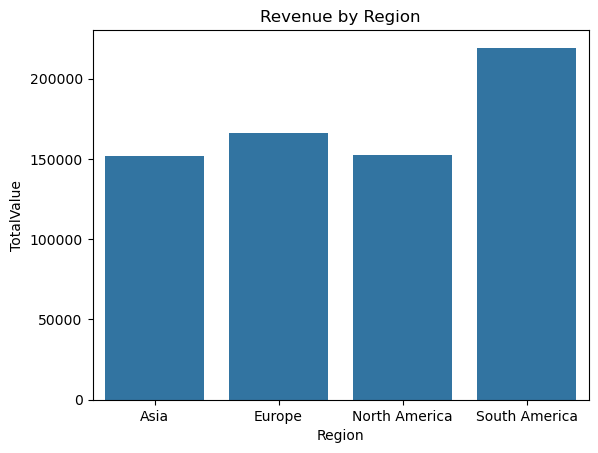

In [16]:
revenue_by_region = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(data=revenue_by_region, x='Region', y='TotalValue')
plt.title('Revenue by Region')
plt.show()

In [22]:
# Merge transactions with products
merged_data = pd.merge(transactions, products, on="ProductID")

# Calculate total revenue per product
product_revenue = merged_data.groupby("ProductID")["TotalValue"].sum().sort_values(ascending=False)

# Calculate top 10 products' revenue contribution
top_10_revenue = product_revenue.head(10).sum()
total_revenue = product_revenue.sum()
top_10_percentage = (top_10_revenue / total_revenue) * 100
top_10_percentage

22.193884841809698

In [24]:
# Count transactions per customer
customer_transactions = merged_data.groupby("CustomerID")["TransactionID"].nunique()

# Calculate percentage of one-time customers
one_time_customers = customer_transactions[customer_transactions == 1].count()
total_customers = customer_transactions.count()
one_time_percentage = (one_time_customers / total_customers) * 100
one_time_percentage

6.030150753768844

In [25]:
# Convert TransactionDate to datetime and extract month
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["Month"] = merged_data["TransactionDate"].dt.month

# Calculate monthly revenue
monthly_revenue = merged_data.groupby("Month")["TotalValue"].sum().sort_values(ascending=False)
monthly_revenue

Month
7     71366.39
9     70603.75
1     66376.39
5     64527.74
8     63436.74
12    62818.72
4     57519.06
2     51459.27
6     48771.18
3     47828.73
10    47063.22
11    38224.37
Name: TotalValue, dtype: float64

In [27]:
# Calculate revenue per customer
customer_revenue = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)

# Calculate top customers' contribution
Z=10
top_customers_revenue = customer_revenue.head(int(len(customer_revenue) * Z / 100)).sum()
total_revenue = customer_revenue.sum()
top_customers_percentage = (top_customers_revenue / total_revenue) * 100
top_customers_percentage

19.10580699968562